# Assignment 8: Mathematical modelling - model estimation
## Preliminaries

In [10]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api as ss


## Task 1: Robust regression ( / 20 pts)
### Question 1 ( / 13 pts)
Start with the function code that you wrote in homework 7. Modify the function simpleRegLossRSS to calculate the summed absolute deviation of the prediction from the data (instead of the residual sum-of-squares). Call this new function simpleRegLossSAD. Modify your simpleRegFit function (Task 3, Question 4) from Homework 7 to take a flexible loss function as a 3rd input argument. Now call the function with your new loss function to calculate a regression line of tailL (y) against age (x) in the possum data set (see HW7). Your function simpleRegFit  should provide a plot of the fit. Compare the fit with the fit you achieved with the squared error (HW7, task 3, question 5). What do you observe?

      fun: 74.0370274395174
 hess_inv: array([[ 0.38092146, -0.07332728],
       [-0.07332728,  0.0146772 ]])
      jac: array([-0.,  2.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 141
      nit: 7
     njev: 129
   status: 2
  success: False
        x: array([34.39445884,  0.36851372])
427.77680496973517
R2= 0.1434203566181308


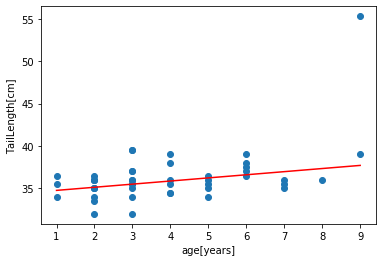

In [11]:
def simpleRegPredict(b,x):
    yp=b[0]+b[1]*x
    return yp 

def simpleRegLossRSS(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (rss,deriv)

def simpleRegLossSAD(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    sad = sum(res.abs())
    deriv = np.zeros(2)
    deriv[0]=-sum(np.sign(res))
    deriv[1]=-sum(np.sign(res)*x)
    return (sad,deriv)

def plotPrediction(b,x,y,predfcn):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predfcn(b,xp)
    ax.plot(xp,yp,'r')
    
def simpleRegFit(x,y,lossFcn=simpleRegLossRSS):
    b0=[np.mean(y),0]
    RES = so.minimize(lossFcn,b0,args=(x,y),jac=True)
    print(RES)
    b=RES.x # Results
    plotPrediction(b,x,y,simpleRegPredict)
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,grad = simpleRegLossRSS(b,x,y)
    print(RSS)
    R2 = 1-RSS/TSS 
    return (R2,b)

    
D=pd.read_csv('possum.csv')
R2,b=simpleRegFit(D.age,D.tailL,lossFcn=simpleRegLossSAD)
plt.xlabel('age[years]')
plt.ylabel('TailLength[cm]')
print('R2=',R2)

*Figure 1* figure shows the scatter plot for the age in years and tail length in cm. The linear regression fit is also plotted on top of the scatter plot.

> The line fits the remaining data points (except the outlier) much better than the solution that minimizes the squared error. Using median regression had a simplar effect as excluding the outlier: it reduced the slope of the fitted line. 

      fun: 388.10162450066576
 hess_inv: array([[ 0.05082113, -0.01009765],
       [-0.01009765,  0.00255215]])
      jac: array([2.41584530e-13, 7.95807864e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([33.35046605,  0.75372836])
388.10162450066576
R2= 0.22286587947604075


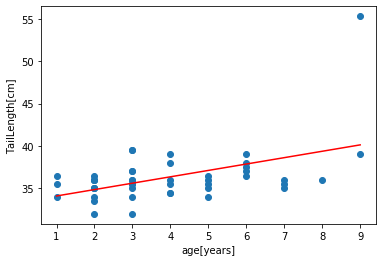

In [12]:
R2,b=simpleRegFit(D.age,D.tailL,lossFcn=simpleRegLossRSS)
plt.xlabel('age[years]')
plt.ylabel('TailLength[cm]')
print('R2=',R2)

## Task 2: Nonlinear (polynomial) regression ( / 40 pts)
For this task, we will use a new data set (fertilizer.csv), which comes from an agricultural study. Each plot of the field (a 10m-by-10m square) was given a randomly determined concentration of fertilizer (in ml/week/m2). The harvest yield for grain in kg/patch was recorded. 
The data has two fields 
- fertCon: Concentration of fertilizer
- harvest: Yield of the harvest in kg


### Question 1 ( / 5 pts)
Load the data set and make a scatter plot of fertilizer concentration on the x-axis and harvest yield on the y-axis. How would you describe the relationship? 

Text(0, 0.5, 'harvest')

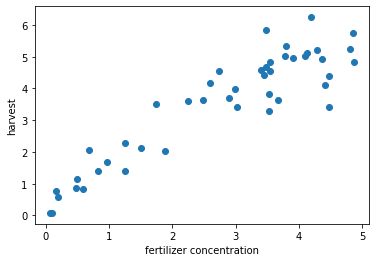

In [13]:
D=pd.read_csv('fertilizer.csv')
plt.scatter(D.fertCon,D.harvest)
plt.xlabel('fertilizer concentration')
plt.ylabel('harvest')


*Figure 2*. Figure shows the scatter plot of harvest yiled vs fertilizer concentration
There is a positive relationship between the two variables that is relatively well described by a line - but not quite - it seems to have some smaller nonlinear component. 

### Question 2 ( / 12 pts)
Write a function called polyRegPredict(b,x) which returns the prediction of a polynomial regression model on x. The length of b should indicate the order of the model. If b has length 1, the model should be of order 0 (constant). If b has length 2, it should be a linear regression model, if b has length 3, it should be quadratic model (order 2). Call your function with x=np.linspace(-5,5,10) and b=[-10,-4,1]. Plot the result as a scatter plot.

Text(0, 0.5, 'y')

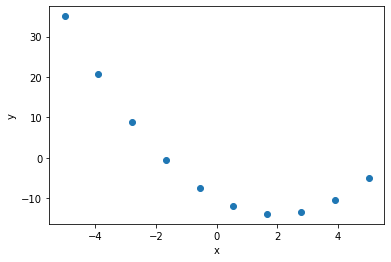

In [14]:
def polyRegPredict(b,x):
    yp=np.zeros(x.shape)
    for i in range(len(b)):
        yp=yp+b[i]*(x**i)
    return yp 

x=np.linspace(-5,5,10)
b=[-10,-4,1]
yp=polyRegPredict(b,x)
plt.scatter(x,yp)
plt.xlabel('x')
plt.ylabel('y')

*Figure 3*. Figure shows the scatter plot of y vs x

### Question 3 ( / 18 pts)
Modify you function simpleRegLossRSS from HW7 to become function polyRegLossRSS, which calculates the residual sum of squares and the derivatives for the polyinomial regression. Also change your function plotPrediction to use polyRegPredict. Then modify your simpleRegFit function to become polyRegFit(x,y,order), which takes the order of the polynomial fit as a third input argument. Call the function for a quadratic fit the harvest yield (y) as a function of fertilizer concentration (x).

Text(0, 0.5, 'harvest yield')

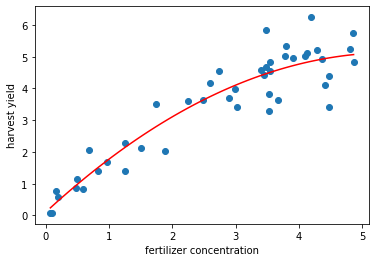

In [22]:
def polyRegLossRSS(b,x,y):
    predY = polyRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    for i in range(len(b)):
        grad[i]=-2*np.sum((x**i)*res)
    return (rss,grad)


def polyRegFit(x,y,order=1,linestyle='r-',fig=True):
    b0=np.zeros((order+1,1))
    RES = so.minimize(polyRegLossRSS,b0,args=(x,y),jac=True,options={'gtol':1e-2})
    b=RES.x # Results
    # b=polyRegressionFit(x,y,order) 
    if (fig):
        plotPrediction(b,x,y,polyRegPredict) 
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,grad = polyRegLossRSS(b,x,y)
    R2 = 1-RSS/TSS 
#     print("R2 is {0:3.2f}".format(R2))
    return (R2,b)

polyRegFit(D.fertCon,D.harvest,order=2)
plt.xlabel('fertilizer concentration')
plt.ylabel('harvest yield')

*Figure 4*. Figure shows the scatter plot harvest yiled vs fertilizer concentration. A quadratic polynomial fit is also shown on top of the scatter plot.

### Question 4 ( / 5 pts)
Call you polyRegression function to produce a polynomial fit of order 8. What is the R2? 

Text(0, 0.5, 'harvest yield')

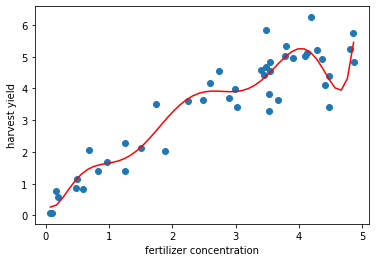

In [23]:
polyRegFit(D.fertCon,D.harvest,8)
plt.xlabel('fertilizer concentration')
plt.ylabel('harvest yield')

*Figure 5*. Figure shows the scatter plot of harvest yield vs. fertilizer concentration. A 8th order polynomial is also plotted on top the scatter plot.

## Task 3: Cross-validation of models ( / 40 pts)
### Question 1 ( / 20 pts)
Write a function leaveOneOutCV, which takes as inputs x and y, a function to be called for the fit, optional input arguments for the fit, and a function to be called for prediction. The function should then perform leave-on-out crossvalidation and calculate the cross-validated R2. It should then fit the model to all data and calculate the fitted R2. The sketch of the function can be found in the lecture. Call the function to get a cross-validated R2 for a polynomial fit of order 8. How much lower is the crossvalidated R2 than the fitted R2? 

Text(0, 0.5, 'harvest yield')

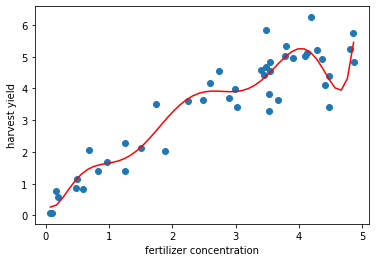

In [25]:
def leaveOneOutCV(x,y,fitfcn=polyRegFit,args=(),predictfcn=polyRegPredict):
    N = len(x) #Number of observations 
    yp= np.zeros(N)
    ind = np.arange(N)
    for i in range(N):
        r,b=fitfcn(x[ind!=i],y[ind!=i],args,fig=False)
        yp[i]=predictfcn(b,x[i])
    TSS  = sum((y-y.mean())**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1-RSScv/TSS

    # Get the model fit 
    r,b=fitfcn(x,y,args)
    yf=predictfcn(b,x)
    RSS   = sum((y-yf)**2)
    R2 = 1-RSS/TSS
    return R2cv,R2 

leaveOneOutCV(D.fertCon,D.harvest,args=(8))
plt.xlabel('fertilizer concentration')
plt.ylabel('harvest yield')

*Figure 6*. Figure shows the scatter plot of harvest yield vs. fertilizer concentration. A 8th order polynomial is also plotted on top the scatter plot.

> The crossvalidated R2 indicates that the model can predict 0.05 (5%) of the variance less than it can fit.  

### Question 2 ( / 20 pts)
Run a loop from model order 0 (constant) to model order 8. For each polynomial model order, call you function leaveOneOutCV to get the crossvalidated R2 and the normal R2 for each model order. Make a plot where you show the line for the crossvalidated R2 and R2 as a function of model order. When is the best crossvalidated R2 reached? When does the model start overfitting? Which model would you use to make a prediction for an unobserved data point? 

In [ ]:
numMod = 9  # Including 0, we need 8 models 
R2 = np.zeros(numMod)
R2cv = np.zeros(numMod)
    
for i in range(numMod):
    R2cv[i],R2[i]=leaveOneOutCV(D.fertCon,D.harvest,args=(i))
    print(i)

    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
model = np.arange(0,numMod)
ax.plot(model,R2,'r')
ax.plot(model,R2cv,'b')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Model Order')
plt.ylabel('Coefficient of Determination')

0
1
2
3
4


> The best cross-validated R2 is reached at a quadratic model (model order 2). Afterwards, the R2cv starts declining. The difference between R2 and cvR2 starts becoming bigger, so the model is starting to overfit the data. I would therefore chose to use the quadratic model to make predictions about new data. 